# Problem Statement
## Predict whether a customer will buy a product based on the available dataset

In [1]:
### Import the required packages
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [38]:
df = pd.read_csv('suv_data.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.shape

(400, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

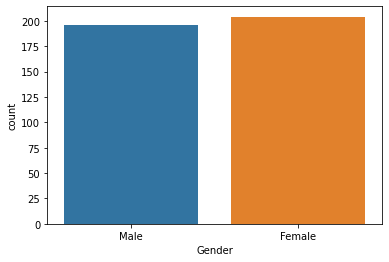

In [41]:
sns.countplot(x = df.Gender)

In [7]:

df1 = df.drop('User ID', axis = 1)

In [39]:
df1

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [9]:
male=pd.get_dummies(df1["Gender"],drop_first=True)
male.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [10]:
df1 = pd.concat([df1,male], axis = 1)

In [11]:
df1

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1
...,...,...,...,...,...
395,Female,46,41000,1,0
396,Male,51,23000,1,1
397,Female,50,20000,1,0
398,Male,36,33000,0,1


In [12]:
df1.drop('Gender', axis = 1, inplace = True)

In [50]:
# instead of encoding, we can replace male as 1 and female as 0 - score remains same. But it may be misleading.
#df1.Gender.replace(['Male', 'Female'],(1,0), inplace = True)

In [13]:
df1.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [32]:
df1

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


<AxesSubplot:xlabel='Purchased', ylabel='count'>

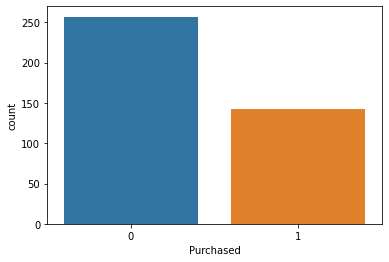

In [43]:
sns.countplot(x = df1.Purchased)

### Model

In [52]:
# defining x and y
x = df1.drop('Purchased', axis = 1)
y = df1.Purchased

In [53]:
from sklearn.metrics import accuracy_score

In [54]:
x = df1.drop('Purchased', axis = 1)
y = df1.Purchased
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.3, random_state=0)
model=LogisticRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
accuracy_score(y_test,predictions)

0.6583333333333333

In [55]:
# Standardization
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  
#Fitting Logistic Regression to the training set  

classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  
pred_classifier = classifier.predict(x_test)
accuracy_score(y_test, pred_classifier)


0.8916666666666667

In [56]:
#MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = df1.drop(['Purchased'], axis = 1)
x = scaler.fit_transform(x)
y = df1.Purchased
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
model=LogisticRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
accuracy_score(y_test,predictions)

0.8333333333333334

#### Metrics - Precision, Recall, F1-Score, Support

In [35]:
from sklearn import metrics

In [36]:
print(metrics.classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.82      0.96      0.88        79
           1       0.89      0.59      0.71        41

    accuracy                           0.83       120
   macro avg       0.85      0.77      0.79       120
weighted avg       0.84      0.83      0.82       120



#### Confusion Matrix

In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[76,  3],
       [17, 24]], dtype=int64)